### k ближайших соседей [Домашнее задание]

Следуйте следующим инструкциям:

1. Загрузите набор данных ```"wine"``` из библиотеки ```sklearn```. (Подсказка: ```sklearn.datasets.load_wine```)

2. Выполните анализ, очистку и всю необходимую предварительную обработку набора данных. Примечание: вам не разрешено отбрасывать точки данных.

3. Разделите данные на ```train``` и ```validation``` со следующим соотношением 8-2, используя функцию ```train_test_split()``` из библиотеки ```sklearn```. Обратите внимание, вы должны установить ```random_state = 1```.

4. Используя алгоритм ```k ближайших соседей``` из библиотеки ```sklearn```, постройте модель для классификации типа вина.

5. Реализуйте алгоритм с нуля ```k ближайших соседей``` как класс KNN(), **использовать библиотеку sklearn нельзя.** Ваша реализация алгоритма должна поддерживать евклидово расстояние и манхэттенское расстояние (```L1 distance```).

    * Ссылка как рассчитать расстояния: https://tproger.ru/translations/3-basic-distances-in-data-science/

6. Используя загруженный набор данных, сравните предоставленный sklearn алгоритм и ваш реализованный алгоритм, они должны иметь точно такие же прогнозы как для евклидово расстояния, так и для манхэттенского расстояния.

7. Найдите лучшее количество соседей ```k``` для каждого типа расстояния и постройте график.

8. Сравните среднее время выполнения одного прогноза с помощью библиотеки ```time```.

Вы можете использовать шаблон кода ниже.

```python
class KNN:
    def __init__(self, n_neighbors=5, p=2):
        # ваш код
        
    def fit(self, X, y):
        # ваш код
    
    def predict(self, X):
        # ваш код
```


**Примечание:** На всех этапах, пожалуйста, включайте пояснения.

### Загрузка и просмотр данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import time

wine = load_wine()
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [2]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [3]:
print(wine.target_names)
print(wine.target)

['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


### Разделение данных на train и test (80:20)

In [5]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Масштабирование данных

In [6]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

In [7]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,12.00,1.51,2.42,22.0,86.0,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450.0
1,12.72,1.81,2.20,18.8,86.0,2.20,2.53,0.26,1.77,3.90,1.16,3.14,714.0
2,12.08,1.39,2.50,22.5,84.0,2.56,2.29,0.43,1.04,2.90,0.93,3.19,385.0
3,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0
4,13.74,1.67,2.25,16.4,118.0,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060.0


In [8]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.96,1.82,680.0
1,12.42,1.61,2.19,22.5,108.0,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345.0
2,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
3,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
4,13.77,1.90,2.68,17.1,115.0,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375.0


### Построение модели без библиотеки sklearn

In [9]:
class KNearestNeighbor:
    def __init__(self, k):
        self.k = k
        self.eps = 1e-8

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test, p=2):
        if p == 2:
            distances = self.compute_euclidian_distance(X_test)
        if p == 1:
            distances = self.compute_manhatten_distance(X_test)
        
        return self.predict_labels(distances)

    def compute_euclidian_distance(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            distances[i, :] = np.sqrt(self.eps + np.sum((self.X_train - X_test[i, :]) ** 2, axis=1)) # евклидова дистанция
        return distances
    
    def compute_manhatten_distance(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.X_train.shape[0]
        distances = np.zeros((num_test, num_train))

        for i in range(num_test):
            distances[i, :] = np.sqrt(self.eps + np.sum(np.abs(self.X_train - X_test[i, :]), axis=1)) # манхеттенская дистанция
        return distances

    def predict_labels(self, distances):
        num_test = distances.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            y_indices = np.argsort(distances[i, :])
            k_closest_classes = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest_classes))

        return y_pred

In [10]:
start = time.time()

knn = KNearestNeighbor(5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test, p=2)
print('Score (euclidian distance used):', sum(y_pred == y_test) / y_test.shape[0] )

end = time.time()
print('time:',end - start)

Score (euclidian distance used): 0.6388888888888888
time: 0.001999378204345703


In [11]:
start = time.time()

knn = KNearestNeighbor(5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test, p=1)
print('Score (manhatten distance used):', sum(y_pred == y_test) / y_test.shape[0] )

end = time.time()
print('time:',end - start)

Score (manhatten distance used): 0.6944444444444444
time: 0.002979755401611328


### Построение модели c помощью библиотеки sklearn

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors=5, p=2) # Для евклидовой дистанции
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Score (euclidian distance used):', metrics.accuracy_score(y_test, y_pred))

end = time.time()
print('time:',end - start)

Score (euclidian distance used): 0.6388888888888888
time: 0.0029935836791992188


In [14]:
start = time.time()

knn = KNeighborsClassifier(n_neighbors=5, p=1) # Для манхеттенской дистанции
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print('Score (manhattan distance used):', metrics.accuracy_score(y_test, y_pred))

end = time.time()
print('time:',end - start)

Score (manhattan distance used): 0.6944444444444444
time: 0.004979133605957031


### Score vs. K-value

In [15]:
k = np.arange(1,101,1)
Score = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    Score.append(metrics.accuracy_score(y_test, y_pred))

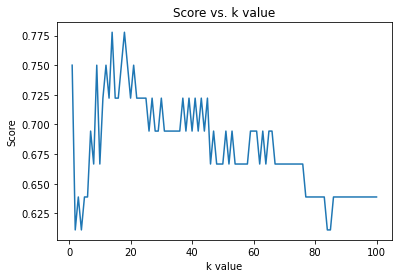

In [16]:
import matplotlib.pyplot as plt
plt.plot(k, Score);
plt.title('Score vs. k value');
plt.xlabel('k value');
plt.ylabel('Score');

<b>Максимальное значение Score наблюдается при K=16 и K=18.

<b> Как видно, время при обработке прогноза, ипользуя библиотеку sklearn примерное в 20-25 раз быстрее, чем время при обработке прогноза, используя функции, написанные вручную.